#### Data Assumptions

users' workout history data from 2017-2020;

1 user can finish multiple workout everyday.

1 workout includes several excercisse, excercise includes multiple sets, user can choose different reps and weights for each set.

Only US users. (covid-19 situation, globally different start time)

#### data dictionary:
1. workoutId: unique for each work out
2. excerciseId: consistant across users/ date/ workouts
3. singleSetId: unique for each set
4. exerciseName: name of excercise (same with exerciseId)
5. reps: # of reps in 1 set
6. weights: weight in 1 set


In [3]:
import pandas as pd
import numpy as np
#from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('fitbod_KangYidi_20200807-215404.csv')
data.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2019-08-09,U7b7BqCHFE,52vo7F7CLd,qHbf3DEGXv,Close-Grip Bench Press,12,65.770972,fake_id_919
1,2020-03-21,H7J6CGEoVo,6REm9Tfqpa,MVucwXO7BI,Dumbbell Row,10,23.813628,fake_id_907
2,2020-04-08,99xt3xMDUH,mvkMgAdecH,u7sYyIw84B,Dumbbell Shoulder Press,15,6.803894,fake_id_895
3,2018-05-29,BlwE48n5YS,ZAIuKpHvue,AgqkHlmdpO,Dumbbell Lunge,7,13.607787,fake_id_904
4,2019-11-22,plFaxGXkok,h85ZOw37Wc,bzY6MtD43F,Dumbbell Bench Press,5,29.483539,fake_id_923


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = [data['Date'][i].month for i in range(len(data))]
data['Year'] = [data['Date'][i].year for i in range(len(data))]

## 1.Exploratory Data Analysis

### 1.1 overview summary

In [6]:
print('Data starts at',min(data['Date']).date(),', ends at',max(data['Date']).date())
print('\n')

print('Among all',(max(data['Date'])-min(data['Date'])).days,'days there are',len(pd.unique(data['Date'])),'days that at least 1 user used Fitbod')

Data starts at 2017-03-28 , ends at 2020-08-06


Among all 1227 days there are 913 days that at least 1 user used Fitbod


In [7]:
# find days no one used:
no_user_days = []

def daterange(date1, date2):
    for n in range((date2-date1).days):
        yield date1 + timedelta(n)

start_date = min(data['Date'])
end_date = max(data['Date'])
#datetime.strftime(single_date,'%Y-%M-%D')
for single_date in daterange(start_date, end_date):
    if np.datetime64(single_date) not in pd.unique(data['Date']):
        no_user_days.append(single_date.date())
        print(single_date.date())
        

2017-03-30
2017-04-01
2017-04-02
2017-04-03
2017-04-05
2017-04-06
2017-04-07
2017-04-08
2017-04-09
2017-04-10
2017-04-12
2017-04-13
2017-04-14
2017-04-15
2017-04-16
2017-04-17
2017-04-18
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-04-29
2017-04-30
2017-05-01
2017-05-02
2017-05-03
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-29
2017-05-30
2017-05-31
2017-06-01
2017-06-02
2017-06-03
2017-06-04
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-10
2017-06-11
2017-06-12
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03

##### Days without active users concentrated in 2017 and 2018

#### DAU pattern

Text(0.5,1,'DAU from 2017-2020')

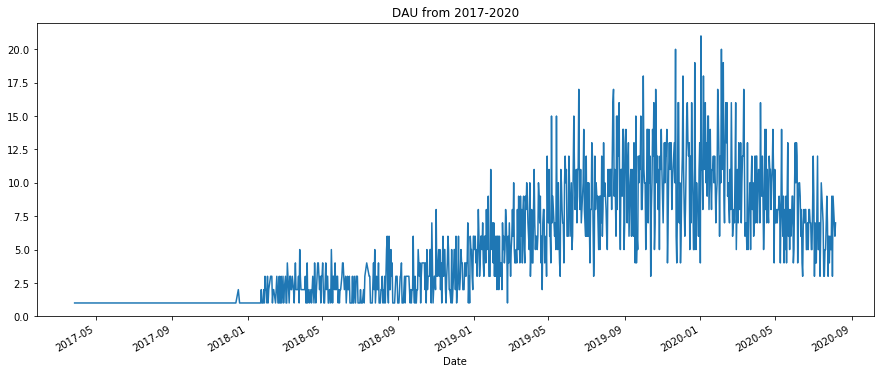

In [8]:
# overall
plt.figure(figsize=(15,6))
data.groupby('Date').nunique()['fake_user_id'].plot()
plt.title('DAU from 2017-2020')

Text(0.5,1,'New users from 2017-2020')

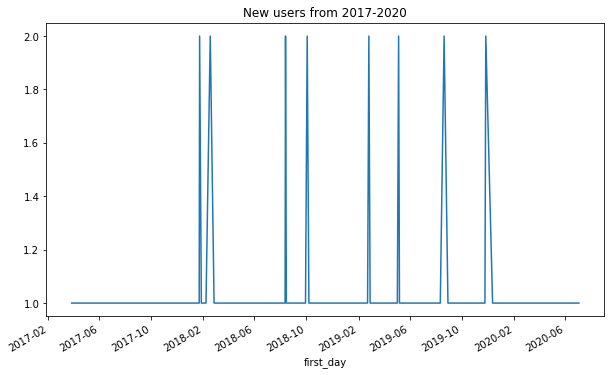

In [9]:
# New users:
first_day = data[['Date','fake_user_id']].groupby('fake_user_id').min()
first_day.columns=['first_day']
first_day = first_day.reset_index()

plt.figure(figsize=(10,6))
first_day.groupby('first_day').count()['fake_user_id'].plot()
plt.title('New users from 2017-2020')

Text(0.5,1,'DAU for existing Users from 2017-2020')

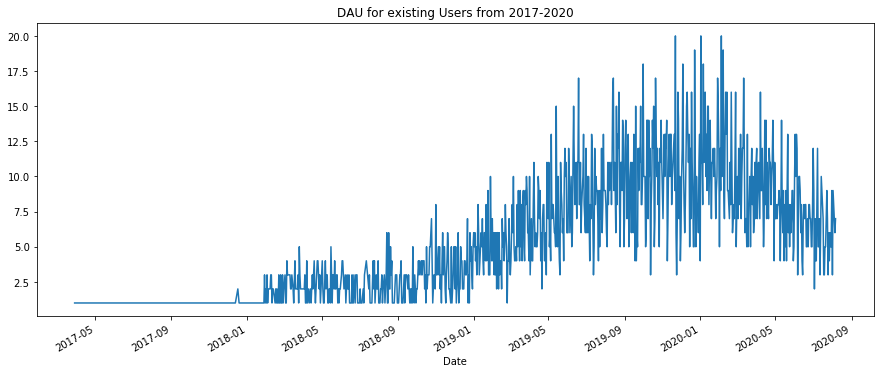

In [10]:
#  Old users:

data = data.merge(first_day,on=['fake_user_id'])
data['new_ind'] = [1 if data['Date'][i]==data['first_day'][i]  else 0 for i in range(len(data))]

plt.figure(figsize=(15,6))
data[data['new_ind']==0].groupby('Date').nunique()['fake_user_id'].plot()
plt.title('DAU for existing Users from 2017-2020')

###### Overall trend represents existing users  (the speed of getting new users is slow)

#### MAU -overall

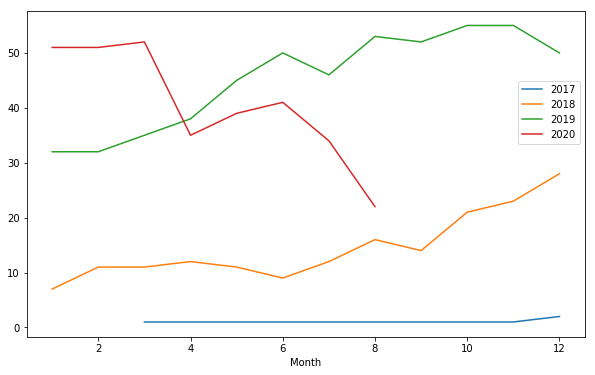

In [11]:
# To see if exist seasonality

plt.figure(figsize=(10,6))
data[data['Year']==2017].groupby('Month').nunique()['fake_user_id'].plot(label='2017')
data[data['Year']==2018].groupby('Month').nunique()['fake_user_id'].plot(label='2018')
data[data['Year']==2019].groupby('Month').nunique()['fake_user_id'].plot(label='2019')
data[data['Year']==2020].groupby('Month').nunique()['fake_user_id'].plot(label='2020')
plt.legend(loc=1,bbox_to_anchor=(1, 0.8))

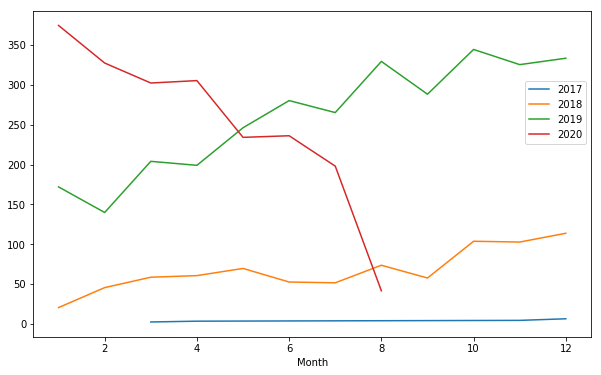

In [12]:
plt.figure(figsize=(10,6))
data[data['Year']==2017].groupby('Month').nunique()['workoutId'].plot(label='2017')
data[data['Year']==2018].groupby('Month').nunique()['workoutId'].plot(label='2018')
data[data['Year']==2019].groupby('Month').nunique()['workoutId'].plot(label='2019')
data[data['Year']==2020].groupby('Month').nunique()['workoutId'].plot(label='2020')
plt.legend(loc=1,bbox_to_anchor=(1, 0.8))
# Feb might be a month that users tend to workout less

##### 2018,2019, MAU has been steadily increasing

##### 2020: MAU down  -------> Why? (internal, external?)------> Covid changed users behavior?

In [15]:
# users behavior for different exercise changed or not?
def check_time(date):
    if date > pd.to_datetime('2020-03-25'):
        return 'during pandemic'
    else:
        return 'before pandemic'
data['log_time']=data['Date'].apply(check_time)
data.head()

data_19_20 = data[data['Date'] > pd.to_datetime('2019-01-01')]
d_1920 = data_19_20[['workoutId','log_time','exerciseName']].pivot_table(index=['exerciseName'],columns='log_time',aggfunc='nunique')['workoutId'].reset_index()
d_1920['before pandemic']=d_1920['before pandemic']/15.83
# 2019-01-01 to 2020-03-25
d_1920['during pandemic']=d_1920['during pandemic']/4.33
# 2020-03-25 to 2020-08-05

d_1920['before-during rate'] = round(d_1920['during pandemic']/d_1920['before pandemic'],3)
# d_1920


In [16]:
print('During pandemic, avg # of workouts per user per month is',round(data_19_20[data_19_20['log_time']=='during pandemic'].nunique()['workoutId']/data_19_20[data_19_20['log_time']=='during pandemic'].nunique()['fake_user_id']/4.33,1), '. Before Pandemic, avg # is',round(data_19_20[data_19_20['log_time']=='before pandemic'].nunique()['workoutId']/data_19_20[data_19_20['log_time']=='before pandemic'].nunique()['fake_user_id']/15.83,2))

During pandemic, avg # of workouts per user per month is 4.2 . Before Pandemic, avg # is 2.79


#### even though we are getting fewer DAUs, but we do have higher user engaement.
strongindicator for loyalty

---------------->

why we lost other users? how can we attract more users?

people do not have access to gym, and do not have proper equipment at home.

### 1.2 excercise specific:

Text(0.5,1,'Comparing rate of # of exercise finished before-during pandemic')

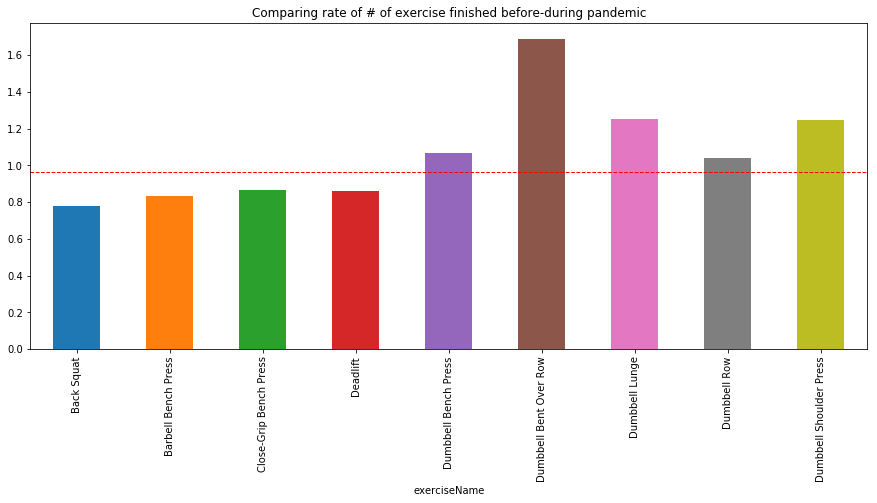

In [17]:

threshold1 = data_19_20[['workoutId','log_time']].pivot_table(index=['log_time'],aggfunc='nunique')['workoutId']['during pandemic']/data_19_20[['workoutId','log_time']].pivot_table(index=['log_time'],aggfunc='nunique')['workoutId']['before pandemic']*15.83/4.33
d_1920 = d_1920.set_index('exerciseName',drop=True)

plt.figure(figsize=(15,6))
d_1920['before-during rate'].plot(kind='bar')
plt.axhline(y=threshold1,linewidth=1,linestyle='dashed', color='r')
plt.title('Comparing rate of # of exercise finished before-during pandemic')

#### user's preference has changed
More 'Dumbbell Bent Over Row','Dumbbell Lunge', 'Dumbbell Shoulder Press' were finished

less 'Back Squat' were finished

#### Can the increase be attributed to general user's behavior? or because a small group of users has been doing this exercise more?
( we have small amount of data, 92 unique in 2019)

Text(0.5,1,'Users preference for exercise before-during pandemic')

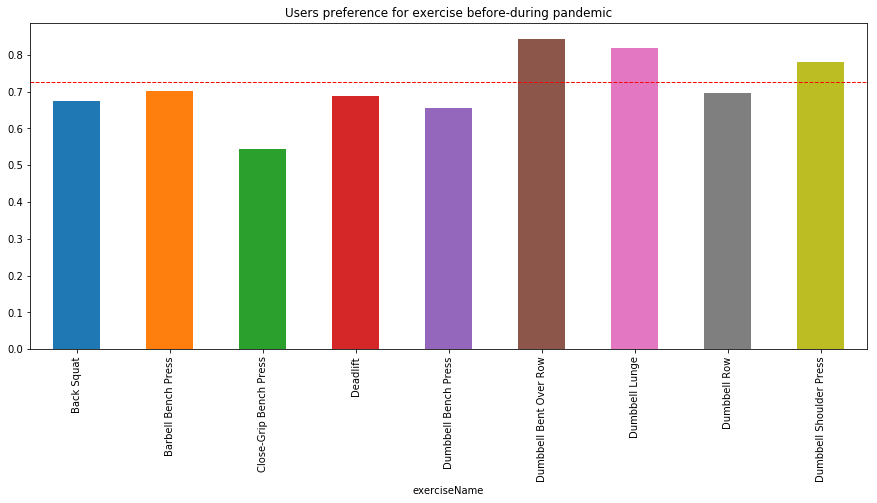

In [18]:
# for unique users, we use similar time interval for 'before' and during pandemic instead of unique users per month
# because for longer period, there is higher percent of repeated users

data_u_19_20 = data_19_20[data_19_20['Date']>pd.to_datetime('2019-11-15')]

d_1920_u = data_u_19_20[['fake_user_id','log_time','exerciseName']].pivot_table(index=['exerciseName'],columns='log_time',aggfunc='nunique')['fake_user_id'].reset_index()
d_1920_u['before pandemic']=d_1920_u['before pandemic']/4.33
d_1920_u['during pandemic']=d_1920_u['during pandemic']/4.33

d_1920_u['before-during rate'] = round(d_1920_u['during pandemic']/d_1920_u['before pandemic'],3)

threshold = data_u_19_20[['fake_user_id','log_time']].pivot_table(index=['log_time'],aggfunc='nunique')['fake_user_id']['during pandemic']/data_u_19_20[['fake_user_id','log_time']].pivot_table(index=['log_time'],aggfunc='nunique')['fake_user_id']['before pandemic']*0.85
d_1920_u = d_1920_u.set_index('exerciseName',drop=True)

plt.figure(figsize=(15,6))
d_1920_u['before-during rate'].plot(kind='bar')
plt.axhline(y=threshold,linewidth=1,linestyle='dashed', color='r')
plt.title('Users preference for exercise before-during pandemic')
#data_19_20[['fake_user_id','log_time','exerciseName']].pivot_table(index=['log_time'],aggfunc='nunique')['fake_user_id']

##### we can dig deeper into:
comparing old user who stayed with those who left. (what kind of exercise)


## 2. Machine learning model

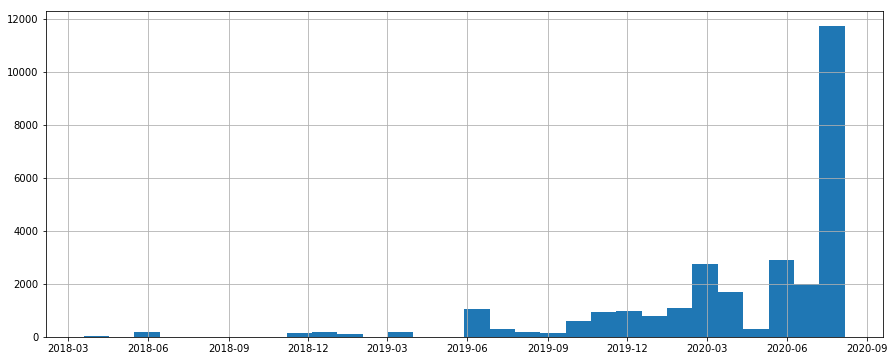

In [19]:
data_all = data.join(data.groupby('fake_user_id').max()['Date'].rename('last_day'),on='fake_user_id')
data_all['loyalty_days'] = data_all['last_day']-data_all['first_day']
data_all['days_since_last'] = data_all['last_day'].apply(lambda x: pd.to_datetime('2020-08-06')-x)
# data_all.head()
plt.figure(figsize=(15,6))
data_all['last_day'].hist(bins=30)

## Predict users' churn basing on historical training data:


### why churned? (unsubscribed)
1. do not need suggestions and routine training anymore

2. do not se satisfied improvement after a while

3. do not have access to GYM (because of covid)

#### Question:
##### During Pandemic, whether a user will churn basing on user profile data and last 30 days training history data.

#### Assumption: 
##### monthly payment users

### 2.1 Data Preperation:
##### (Stand at the point of 2020-08-05)

In [20]:
# 'last_day' > 2020-04-25: users who stayed after pandemic started. (payments are monthly) 22 unique users
print('There are',data_all[data_all['last_day']>=pd.to_datetime('2020-04-25')]['fake_user_id'].nunique(),'users who stayed after pandemic started.\n')

# regard 'last_day' > 2020-07-05 users did not churn. (been active in the last 30 days) 34 unique users
print('Among them,',data_all[(data_all['last_day']>=pd.to_datetime('2020-04-25')) & (data_all['last_day']<=pd.to_datetime('2020-07-05'))]['fake_user_id'].nunique(),'users churned during pandemic.\n')

# regard 'last_day' > 2020-04-25 but 'last_day' < 2020-07-05 as users churned.  
print(data_all[data_all['last_day']>pd.to_datetime('2020-07-05')]['fake_user_id'].nunique(),'users did not churn.\n')

data_m = data_all[data_all['last_day']>=pd.to_datetime('2020-04-25')]
data_m['last_30_days'] = data_m['last_day'].apply(lambda x: x-timedelta(30))

# data_m.tail()

There are 56 users who stayed after pandemic started.

Among them, 22 users churned during pandemic.

34 users did not churn.



### 2.2 Feature Engineering:
#### user profile data: 
loyalty days; active days; # of workouts; how many kinds of exercise tried
#### user last 30 days data:
active days; # of workouts; how many kinds of exercise tried in 30 days
#### user improvement data: 
for each exercise, sets reps and weights improvement from start to last

In [21]:
# user profile data:

# summarize data (active days; # of workouts; how many kinds of exercise tried)
X = data_m.pivot_table(values=['Date','workoutId','exerciseId'],index='fake_user_id',aggfunc='nunique')[['Date','workoutId','exerciseId']].fillna(0)
X.columns=['active_days','#_of_workouts','kinds_of_exercise']

########################
# one hot encoding
# what exercise user has finished
X = X.join(data_m.pivot_table(values='exerciseId',index='fake_user_id',columns='exerciseName',aggfunc='nunique').fillna(0))

# loyalty days, days_since_last
X = X.join(data_m.pivot_table(values=['loyalty_days','days_since_last'],index='fake_user_id',aggfunc='max').fillna(0))
## days_since_last: not a feature, only will be used for generating labels

X['churned'] = X['days_since_last'].apply(lambda x: 0 if x <= timedelta(30) else 1)

X.tail()

,active_days,#_of_workouts,kinds_of_exercise,Back Squat,Barbell Bench Press,Close-Grip Bench Press,Deadlift,Dumbbell Bench Press,Dumbbell Bent Over Row,Dumbbell Lunge,Dumbbell Row,Dumbbell Shoulder Press,days_since_last,loyalty_days,churned
fake_user_id,,,,,,,,,,,,,,,
fake_id_992,5,5,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4 days,347 days,0
fake_id_993,29,29,4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,10 days,396 days,0
fake_id_994,4,4,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7 days,27 days,0
fake_id_995,8,8,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,81 days,42 days,1
fake_id_996,7,7,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,80 days,187 days,1


In [22]:
# user last 30 days data
last_30 = data_m[data_m['Date']>=data_m['last_30_days']]
last_30 = last_30.pivot_table(values=['Date','workoutId','exerciseId'],index='fake_user_id',aggfunc='nunique')[['Date','workoutId','exerciseId']].fillna(0)
last_30.columns=['30_active_days','30_#_of_workouts','30_kinds_of_exercise']
#last_30.tail()
X = X.join(last_30)
X.head()

,active_days,#_of_workouts,kinds_of_exercise,Back Squat,Barbell Bench Press,Close-Grip Bench Press,Deadlift,Dumbbell Bench Press,Dumbbell Bent Over Row,Dumbbell Lunge,Dumbbell Row,Dumbbell Shoulder Press,days_since_last,loyalty_days,churned,30_active_days,30_#_of_workouts,30_kinds_of_exercise
fake_user_id,,,,,,,,,,,,,,,,,,
fake_id_895,116,140,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3 days,493 days,0,8,11,7
fake_id_896,197,201,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5 days,557 days,0,11,11,5
fake_id_897,54,55,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1 days,199 days,0,9,9,7
fake_id_898,77,77,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0 days,947 days,0,5,5,4
fake_id_899,58,62,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12 days,244 days,0,9,9,6


In [23]:
# user improvement data

start = data_m.groupby(['Date','exerciseId','exerciseName','fake_user_id']).count().reset_index().groupby(['fake_user_id','exerciseId','exerciseName']).min().reset_index()[['fake_user_id','exerciseName','Date','singleSetId']]
start.columns = ['fake_user_id','exerciseName','start_Date','start sets']

end = data_m.groupby(['Date','exerciseId','exerciseName','fake_user_id']).count().reset_index().groupby(['fake_user_id','exerciseId','exerciseName']).max().reset_index()[['fake_user_id','exerciseName','Date','singleSetId']]
end.columns = ['fake_user_id','exerciseName','end_Date','end sets']

improv = start.merge(end,on=['fake_user_id','exerciseName'],how='inner')

start = data_m.groupby(['fake_user_id','exerciseId','exerciseName','Date']).mean().reset_index()[['fake_user_id','exerciseName','Date','reps','weight']]
improv = improv.merge(start,left_on=['fake_user_id','exerciseName','start_Date'],right_on=['fake_user_id','exerciseName','Date'],how='left')
improv = improv.merge(start,left_on=['fake_user_id','exerciseName','end_Date'],right_on=['fake_user_id','exerciseName','Date'],how='left')

improv.columns=['fake_user_id', 'exerciseName', 'start_Date', 'start sets', 'end_Date',
       'end sets', 'Date', 'start reps', 'start weight', 'Date', 'end reps',
       'end weight']
improv = improv[['fake_user_id', 'exerciseName', 'start_Date', 'start sets', 'end_Date',
       'end sets', 'start reps', 'start weight', 'end reps','end weight']]

improv.head(5)

,fake_user_id,exerciseName,start_Date,start sets,end_Date,end sets,start reps,start weight,end reps,end weight
0,fake_id_895,Close-Grip Bench Press,2019-04-01,2,2020-07-26,7,3.0,65.317379,10.0,43.091326
1,fake_id_895,Dumbbell Row,2019-03-29,2,2020-07-17,5,10.0,14.174778,15.0,13.607787
2,fake_id_895,Back Squat,2019-03-30,1,2020-08-03,8,6.0,81.646724,3.5,105.838346
3,fake_id_895,Dumbbell Lunge,2019-03-29,3,2020-05-30,5,2.0,18.143716,8.0,9.071858
4,fake_id_895,Dumbbell Bent Over Row,2019-04-08,2,2020-04-13,9,10.0,9.979044,8.0,18.143716


In [24]:
# If we have more users data, we can proceed with exercise level. (avoid too many features because of user volumn in data)

improv['set_imp'] = improv['end sets'] - improv['start sets']
improv['reps_imp'] = improv['end reps'] - improv['start reps']
improv['weight_imp'] = improv['end weight'] - improv['start weight']
improv = improv[['fake_user_id', 'exerciseName','set_imp','reps_imp','weight_imp']]
X = X.join(improv.groupby('fake_user_id').mean())
X.head()

y = X['churned']
x = X[['active_days', '#_of_workouts', 'kinds_of_exercise', 'Back Squat',
       'Barbell Bench Press', 'Close-Grip Bench Press', 'Deadlift',
       'Dumbbell Bench Press', 'Dumbbell Bent Over Row', 'Dumbbell Lunge',
       'Dumbbell Row', 'Dumbbell Shoulder Press', 
       'loyalty_days', '30_active_days', '30_#_of_workouts',
       '30_kinds_of_exercise', 'set_imp', 'reps_imp', 'weight_imp']]


### 2.3 feature selection

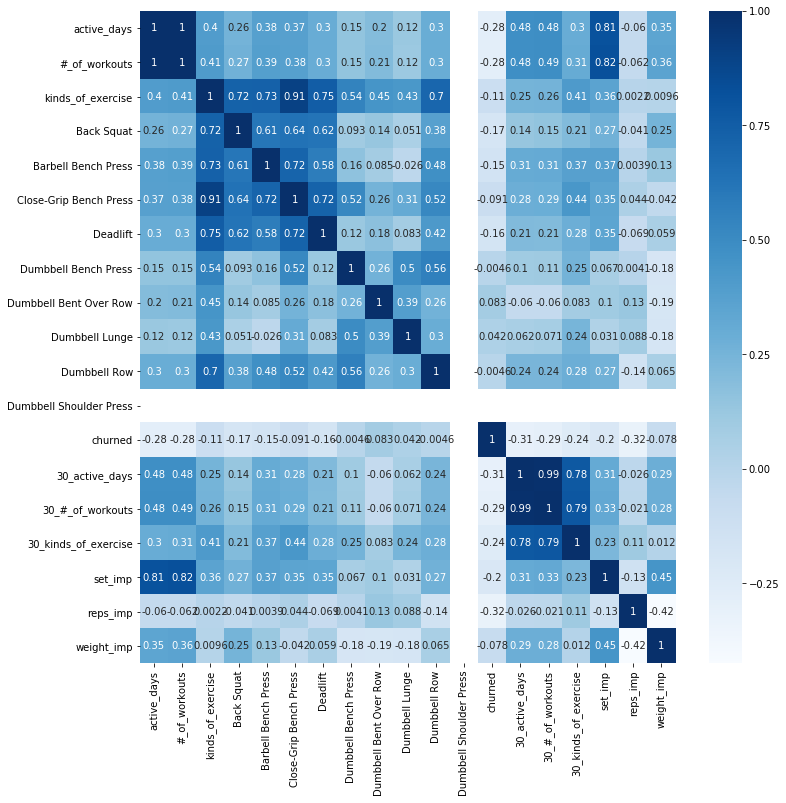

In [25]:
# Check highly correlated features
plt.figure(figsize=(12,12))
sns.heatmap(X.fillna(0).corr(),annot=True,cmap="Blues")

#### Correlated features:
'active days' with '# of workouts';

'set_imp' with 'active days' and '# of workouts'

'kinds of exercise' with 'Close-Grip bench press'

#### ---> remove some of them & explore rate

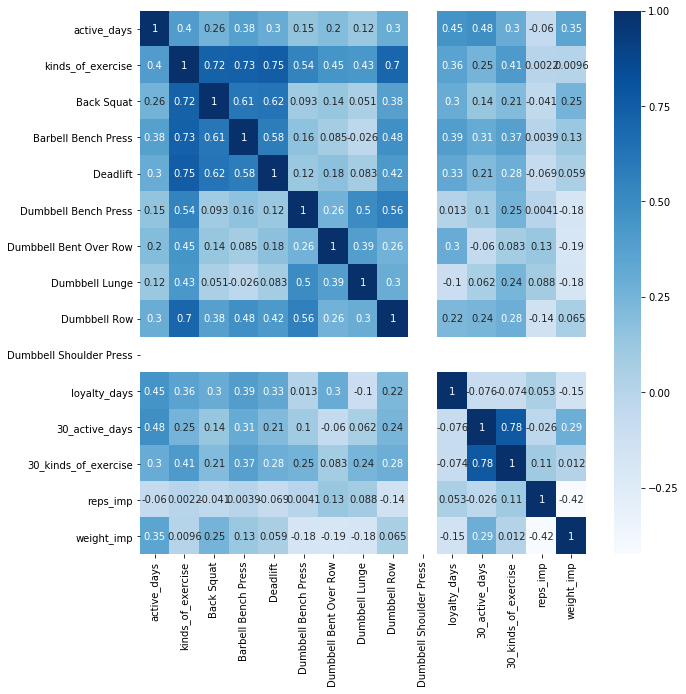

In [26]:
x['avg workout'] = x['#_of_workouts']/x['active_days']
x['avg set imp'] = x['set_imp']/x['active_days']
x['30 avg workout'] = x['30_#_of_workouts']/x['30_active_days']
x = x[['active_days', 'kinds_of_exercise', 'Back Squat','Barbell Bench Press', 'Deadlift','Dumbbell Bench Press', 'Dumbbell Bent Over Row', 'Dumbbell Lunge',
       'Dumbbell Row', 'Dumbbell Shoulder Press', 'loyalty_days', '30_active_days','30_kinds_of_exercise',  'reps_imp', 'weight_imp']]
x['loyalty_days'] = x['loyalty_days'].dt.days
# Check highly correlated features
plt.figure(figsize=(10,10))
sns.heatmap(x.fillna(0).corr(),annot=True,cmap="Blues")

In [27]:
# train test data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

### 2.4 Model Building

#### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test) # 0:Overcast, 2:Mild
print ('Predicted Value:', predicted)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predicted))
# print(confusion_matrix(y_test,predicted))

# imbalanced dataset, so accuracy not useful

Predicted Value: [0 0 0 1 0 0 0 0 0 0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.50      0.20      0.29         5

   micro avg       0.64      0.64      0.64        14
   macro avg       0.58      0.54      0.52        14
weighted avg       0.61      0.64      0.59        14

